###Atharva Mankame [21BAI1780]

### Implementing an autoencoder a dimensionality reduction technique. (Use any image dataset). Extracting reduced features from latent space.

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [5]:
input_img = Input(shape=(3072,))  # 32x32x3 = 3072 for CIFAR-10

In [6]:
# Encoder
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
# Decoder
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(3072, activation='sigmoid')(decoded)

In [7]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/10
196/196 [==============================] - 40s 181ms/step - loss: 0.0380 - val_loss: 0.0254
Epoch 2/10
196/196 [==============================] - 29s 147ms/step - loss: 0.0223 - val_loss: 0.0224
Epoch 3/10
196/196 [==============================] - 29s 149ms/step - loss: 0.0190 - val_loss: 0.0183
Epoch 4/10
196/196 [==============================] - 32s 162ms/step - loss: 0.0171 - val_loss: 0.0166
Epoch 5/10
196/196 [==============================] - 30s 151ms/step - loss: 0.0162 - val_loss: 0.0160
Epoch 6/10
196/196 [==============================] - 30s 151ms/step - loss: 0.0154 - val_loss: 0.0152
Epoch 7/10
196/196 [==============================] - 31s 160ms/step - loss: 0.0147 - val_loss: 0.0142
Epoch 8/10
196/196 [==============================] - 31s 157ms/step - loss: 0.0140 - val_loss: 0.0149
Epoch 9/10
196/196 [==============================] - 29s 147ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 10/10
196/196 [==============================] - 29s 146ms/step - l

In [9]:
# features from latent space
encoder = Model(input_img, encoded)
encoded_features_train = encoder.predict(X_train)
encoded_features_test = encoder.predict(X_test)

313/313 [==============================] - 2s 7ms/step


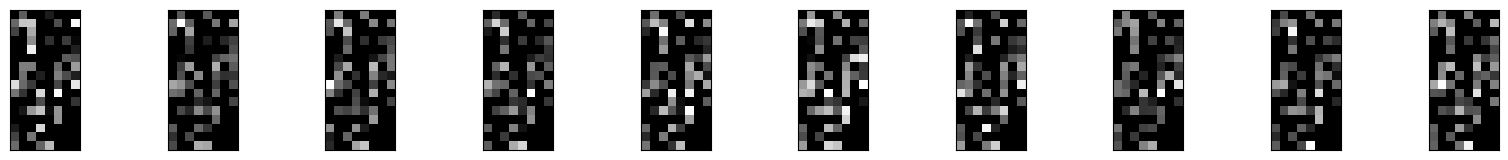

In [10]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):

    # reconstructed imgs
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_features_test[i].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
